## An example of a boundary-value problem.
In a boundary value problem, we look for a function that satisfies a certain property. 

Here, we look at solving the Boundary Value Problem:
$$  u''(x) = f(x) $$
where x ranges between $[0, 1]$ and $u(0) = \alpha$ and $u(1) = \beta$.

This is different from a standard ODE because we have TWO constraints,
one at $u(0)$ and one at $u(1)$.


## To solve use a finite difference discretization on a grid.
We use a grid presentation of the function $u(x)$ on the interval $[0,1]$
so we divide $[0,1]$ up into $N+1$ increments of $1/N$ each.

This means that u is a vector with n = N+1 elements, but two of them are
fixed at alpha and beta. 



[Plots.jl] Initializing backend: pyplot



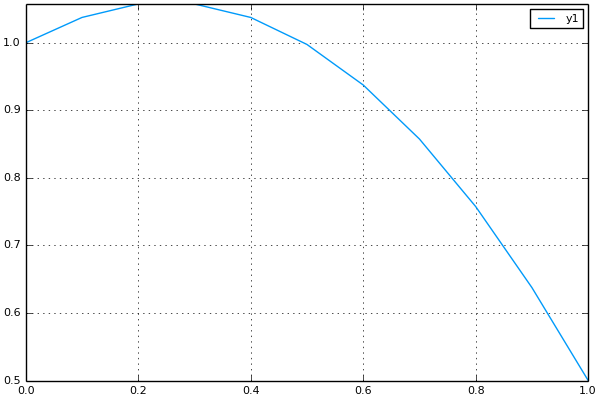

In [2]:

using Plots
N = 10
xgrid = collect(0:1/N:1)

n = length(xgrid)

example_u = zeros(n);
example_u[1] = 1       # suppose alpha = 1
example_u[end] = 1/2   # suppose beta = 1/2

example_u[2:end-1] = 1.06-1*(xgrid[2:end-1]-0.25).^2;

plot(xgrid, example_u)



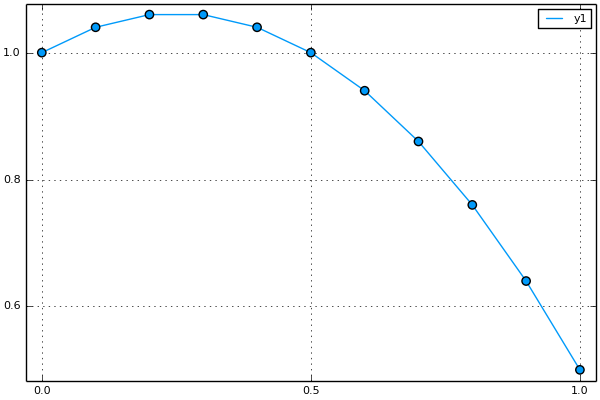

In [5]:
N = 10
xgrid = collect(0:1/N:1)

alpha = 1
beta = 0.5
f = x -> -2.0
h = 1/N

A = zeros(N+1,N+1)
b = zeros(N+1,1)
for i=1:N+1
    if i == 1
        A[i,i] = 1
        b[i] = alpha
    elseif i==N+1
        A[i,i] = 1
        b[i] = beta
    else
        A[i,i-1] = 1/h^2
        A[i,i] = (-2)/h^2
        A[i,i+1] = 1/h^2
        b[i] = f(xgrid[i])
    end
end
u = A\b
plot(xgrid, u, marker=:circle)

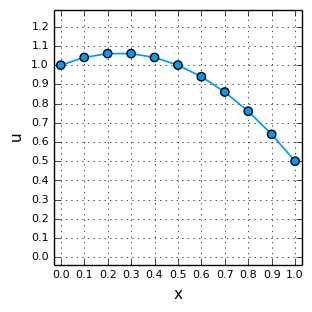

In [31]:
plot(xgrid, u, legend=false, marker=:circle, linewidth=1.25, markersize=6,size=(100*3,100*3))
xlabel!("x")
ylabel!("u")
xticks!(0:.1:1)
yticks!(0:.1:1.2)
ylims!(0,1.25)
PyPlot.gcf()[:set_size_inches](3,3)
savefig("bvp-example.pdf")

In [6]:
for i=1:N+1
    for j=1:N+1
        @printf("%i & ", round(A[i,j]))
    end
    @printf(" \\\\ \n")
end


1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &  \\ 
100 & -200 & 100 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &  \\ 
0 & 100 & -200 & 100 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &  \\ 
0 & 0 & 100 & -200 & 100 & 0 & 0 & 0 & 0 & 0 & 0 &  \\ 
0 & 0 & 0 & 100 & -200 & 100 & 0 & 0 & 0 & 0 & 0 &  \\ 
0 & 0 & 0 & 0 & 100 & -200 & 100 & 0 & 0 & 0 & 0 &  \\ 
0 & 0 & 0 & 0 & 0 & 100 & -200 & 100 & 0 & 0 & 0 &  \\ 
0 & 0 & 0 & 0 & 0 & 0 & 100 & -200 & 100 & 0 & 0 &  \\ 
0 & 0 & 0 & 0 & 0 & 0 & 0 & 100 & -200 & 100 & 0 &  \\ 
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 100 & -200 & 100 &  \\ 
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 &  \\ 


## An example of the steady-state heat equation
Here, we look at solving the Boundary Value Problem:

$$ (\partial ( p(x) ( \partial u/\partial x ) ) / \partial x = f(x) $$
 
where x ranges between [0, 1] and u(0) = alpha and u(1) = beta.

This means we are looking for a function, u(x) where
   
$$(p(x) u'(x))' = f(x)$$
$$ p(x) u''(x) + p'(x) u'(x) = f(x) $$

and u(0) = alpha and u(1) = beta.

Approximate the derivatives
  $$  (\partial ( p(x) ( \partial u/\partial x ) ) / \partial x = f(x) $$
outside-in. To make this clear, lets call
$$    g(x) = p(x) ( \partial u/\partial x ) $$
In which case, we have partial $g(x) / \partial x = f(x)$
so if we use a central difference formula with width "h", we get
$$ f(x) = 1/h ( g(x+h/2) - g(x-h/2) ) $$

But, then, we can use the same idea to evaluate g(x+h/2)

$$  g(x+h/2) = p(x+h/2) 1/h (u(x+h) - u(x)) $$
$$  g(x-h/2) = p(x-h/2) 1/h (u(x) - u(x-h)) $$

Thus, we have a system of linear equations we can solve for 
f(x), and u(x). Suppose that $u_i = u(x_i), u_{i+1} = u(x_i + h), 
$u_{i-1} = u(x_i - h)$, then:



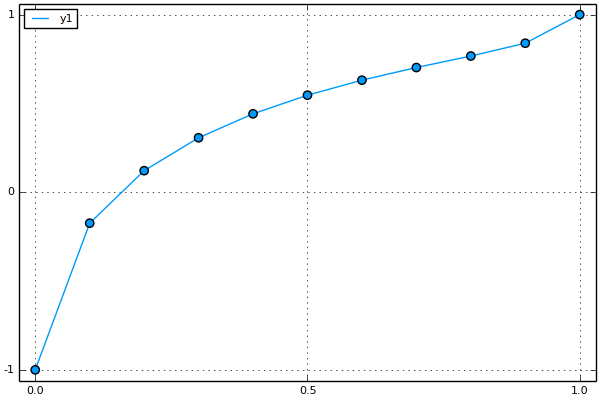

In [39]:

# The solution strategy
# The idea with BVPs is to approximate the solution on a grid of points.
# Let's divide the region into 11 values

N = 10
xgrid = collect(0:1/N:1)

alpha = -1
beta = 1
f = x -> -2*sin(pi*x)   # we are heating a rod in the middle
p = x -> 1-4*(x-0.5)^2  # the rod becomes more like an insulator towards the end.
h = 1/N

A = zeros(N+1,N+1)
b = zeros(N+1,1)
for i=1:N+1
    if i == 1
        A[i,i] = 1
        b[i] = alpha
    elseif i==N+1
        A[i,i] = 1
        b[i] = beta
    else
        A[i,i-1] = p(xgrid[i] - h/2)/h^2
        A[i,i] = (-p(xgrid[i] + h/2)-p(xgrid[i] - h/2))/h^2
        A[i,i+1] = p(xgrid[i] + h/2)/h^2
        b[i] = f(xgrid[i])
    end
end
u = A\b
plot(xgrid, u, marker=:circle)